In [2]:
import os
import cv2
import numpy as np
files = []
directory = r'C:\Users\Achyuta Rajaram\Dropbox (Phillips Exeter)\IMAGECAPTIONING\flickr30k_images'
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        files.append(os.path.join(directory,filename))
    else:
        continue

In [3]:
from random import sample

In [4]:
train_files = sample(files,27000)

In [5]:
validation=np.setdiff1d(files,train_files)

In [6]:
validation=list(validation)

In [7]:
val_data=[]
for file in validation:
    img = cv2.imread(file)
    converted = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255 
    val_data.append(converted)

In [8]:
val_data = np.array(val_data)

In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [1]:
import os
import cv2
import numpy as np
data=[]
count =0
directory = r'C:\Users\Achyuta Rajaram\Dropbox (Phillips Exeter)\IMAGECAPTIONING\flickr30k_images'
for filename in os.listdir(directory):
    if filename.endswith(".jpg") and count<5000:
        file = os.path.join(directory,filename)
        img = cv2.imread(file)
        converted = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255 
        data.append(converted)
        count+=1
    else:
        continue

In [2]:
data = np.array(data)

In [9]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [10]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras import Sequential
from keras.layers import Bidirectional
from keras.optimizers import Adam
from keras import regularizers
from keras.layers import RepeatVector
from keras.layers import Input
import keras.utils as utils
from keras import Model
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Conv2DTranspose
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
from keras import callbacks

Using TensorFlow backend.


In [68]:

checkpoint_filepath = 'tanh_weights.{loss:.5f}.hdf5'
model_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='accuracy',
    mode='max',
    save_best_only=False)

In [23]:
from tqdm import trange

In [24]:
def train(model, epochs):
    for epoch in range(epochs):
        t = trange(1687)
        for batch in t:
            sampl = sample(train_files,16)
            data = []
            for file in sampl:
                img = cv2.imread(file)
                converted = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255
                data.append(converted)
            train_data = np.array(data)
            if batch==1686:
                history=model.fit(train_data,train_data,callbacks=[model_checkpoint_callback])
                t.set_description(str(history.history["loss"]))
            else:
                history=model.fit(train_data,train_data,verbose=0)
                t.set_description(str(history.history["loss"]))

In [72]:
autoencoder = Sequential()
autoencoder.add(Conv2D(256,(3,3), strides =1,input_shape =(384,512,3),padding = "same"))
autoencoder.add(BatchNormalization(axis=-1))
autoencoder.add(LeakyReLU(alpha=0.2))
autoencoder.add(Conv2D(256,(3,3), strides =2,padding = "same"))
autoencoder.add(LeakyReLU(alpha=0.2))
autoencoder.add(BatchNormalization(axis=-1))
autoencoder.add(Conv2D(256,(3,3), strides =2,padding = "same"))
autoencoder.add(LeakyReLU(alpha=0.2))
autoencoder.add(BatchNormalization(axis=-1))
autoencoder.add(Conv2D(256,(3,3), strides =2,padding = "same"))
autoencoder.add(LeakyReLU(alpha=0.2))
autoencoder.add(BatchNormalization(axis=-1))
autoencoder.add(Conv2DTranspose(256,(2,2), strides = 2))
autoencoder.add(LeakyReLU(alpha=0.2))
autoencoder.add(BatchNormalization(axis=-1))
autoencoder.add(Conv2DTranspose(256,(2,2), strides = 2))
autoencoder.add(LeakyReLU(alpha=0.2))
autoencoder.add(BatchNormalization(axis=-1))
autoencoder.add(Conv2DTranspose(256,(2,2), strides = 2))
autoencoder.add(LeakyReLU(alpha=0.2))
autoencoder.add(BatchNormalization(axis=-1))
autoencoder.add(Conv2DTranspose(3,(1,1), activation = "sigmoid"))

In [78]:
autoencoder = Sequential()
autoencoder.add(Conv2D(32,(3,3), strides =1,input_shape =(384,512,3),padding = "same"))
autoencoder.add(BatchNormalization(axis=-1))
autoencoder.add(Conv2D(32,(3,3), strides =2,padding = "same", activation = "tanh"))
autoencoder.add(BatchNormalization(axis=-1))
autoencoder.add(Conv2D(32,(3,3), strides =2,padding = "same", activation = "tanh"))
autoencoder.add(BatchNormalization(axis=-1))
autoencoder.add(Conv2D(32,(3,3), strides =2,padding = "same", activation = "tanh"))
autoencoder.add(BatchNormalization(axis=-1))
autoencoder.add(Conv2DTranspose(32,(2,2), strides = 2, activation = "tanh"))
autoencoder.add(BatchNormalization(axis=-1))
autoencoder.add(Conv2DTranspose(32,(2,2), strides = 2, activation = "tanh"))
autoencoder.add(BatchNormalization(axis=-1))
autoencoder.add(Conv2DTranspose(32,(2,2), strides = 2, activation = "tanh"))
autoencoder.add(BatchNormalization(axis=-1))
autoencoder.add(Conv2DTranspose(3,(1,1), activation = "sigmoid"))

In [25]:
small_autoencoder = Sequential()
small_autoencoder.add(Conv2D(32,(3,3), strides =1,input_shape =(384,512,3),padding = "same"))
small_autoencoder.add(BatchNormalization(axis=-1))
small_autoencoder.add(LeakyReLU(alpha=0.2))
small_autoencoder.add(Conv2D(32,(3,3), strides =2,padding = "same"))
small_autoencoder.add(LeakyReLU(alpha=0.2))
small_autoencoder.add(BatchNormalization(axis=-1))
small_autoencoder.add(Conv2D(32,(3,3), strides =2,padding = "same"))
small_autoencoder.add(LeakyReLU(alpha=0.2))
small_autoencoder.add(BatchNormalization(axis=-1))
small_autoencoder.add(Conv2D(32,(3,3), strides =2,padding = "same"))
small_autoencoder.add(LeakyReLU(alpha=0.2))
small_autoencoder.add(BatchNormalization(axis=-1))
small_autoencoder.add(Conv2D(32,(3,3), strides =2,padding = "same"))
small_autoencoder.add(LeakyReLU(alpha=0.2))
small_autoencoder.add(BatchNormalization(axis=-1))
small_autoencoder.add(Conv2DTranspose(32,(2,2), strides = 2))
small_autoencoder.add(LeakyReLU(alpha=0.2))
small_autoencoder.add(BatchNormalization(axis=-1))
small_autoencoder.add(Conv2DTranspose(32,(2,2), strides = 2))
small_autoencoder.add(LeakyReLU(alpha=0.2))
small_autoencoder.add(BatchNormalization(axis=-1))
small_autoencoder.add(Conv2DTranspose(32,(2,2), strides = 2))
small_autoencoder.add(LeakyReLU(alpha=0.2))
small_autoencoder.add(BatchNormalization(axis=-1))
small_autoencoder.add(Conv2DTranspose(32,(2,2), strides = 2))
small_autoencoder.add(LeakyReLU(alpha=0.2))
small_autoencoder.add(BatchNormalization(axis=-1))
small_autoencoder.add(Conv2DTranspose(3,(1,1), activation = "sigmoid"))

NameError: name 'keras' is not defined

In [85]:
train(autoencoder, 1)

[0.0029533167835325003]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 1686/1687 [3:12:19<00:06,  6.80s/it]

Epoch 1/1
16/16 [==============================] - 7s 411ms/step - loss: 0.0031


[0.003077278845012188]: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1687/1687 [3:12:26<00:00,  6.84s/it]


In [ ]:
autoencoder.fit(data, data, epochs=20,batch_size=16, validation_split=0.2)

In [29]:
import keras

In [38]:
small_autoencoder.save('image_autoencoder.h5')

In [42]:
small_autoencoder = keras.models.load_model("compressed_weights.0.00493.hdf5")

In [40]:
load2=keras.models.load_model("32_weights.0.00225.hdf5")

In [57]:
image_encoder = Model(inputs=load2.inputs, outputs=load2.layers[10].output)

In [31]:
image = cv2.imread(os.path.join(r"C:\Users\Achyuta Rajaram\Dropbox (Phillips Exeter)\IMAGECAPTIONING\flickr30k_images","8251170369.jpg"))

In [34]:
import matplotlib.pyplot

In [52]:
n=420

In [62]:
np.amin(image_encoder.predict(val_data[n].reshape(1,384,512,3)))

-1.6898873

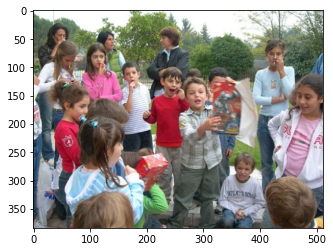

In [53]:
matplotlib.pyplot.imshow(val_data[n] )

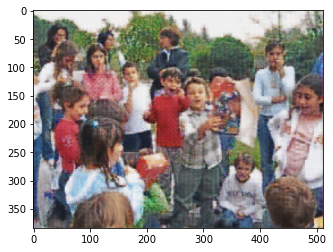

In [81]:
matplotlib.pyplot.imshow(autoencoder.predict(val_data[n].reshape(1,384,512,3)).reshape(384,512,3))

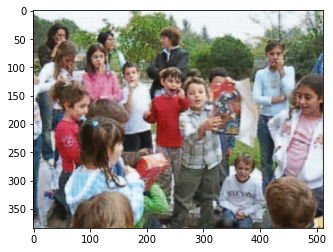

In [84]:
matplotlib.pyplot.imshow(autoencoder.predict(val_data[n].reshape(1,384,512,3)).reshape(384,512,3))

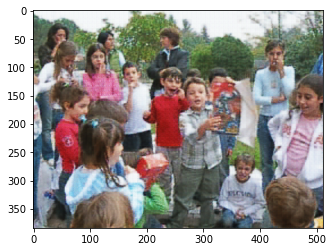

In [86]:
matplotlib.pyplot.imshow(autoencoder.predict(val_data[n].reshape(1,384,512,3)).reshape(384,512,3))

In [82]:
autoencoder.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 384, 512, 32)      896       
_________________________________________________________________
batch_normalization_49 (Batc (None, 384, 512, 32)      128       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 192, 256, 32)      9248      
_________________________________________________________________
batch_normalization_50 (Batc (None, 192, 256, 32)      128       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 96, 128, 32)       9248      
_________________________________________________________________
batch_normalization_51 (Batc (None, 96, 128, 32)       128       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 48, 64, 32)       

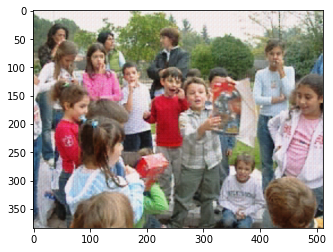

In [56]:
matplotlib.pyplot.imshow(load2.predict(val_data[n].reshape(1,384,512,3)).reshape(384,512,3))

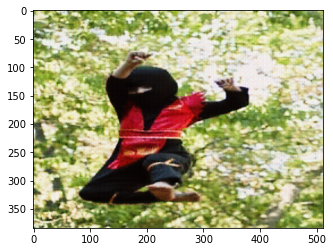

In [37]:
matplotlib.pyplot.imshow(small_autoencoder.predict(val_data[205].reshape(1,384,512,3)).reshape(384,512,3))

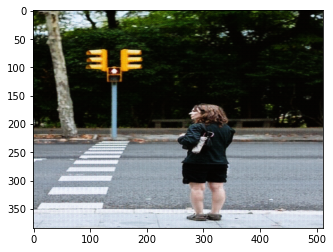

In [19]:
matplotlib.pyplot.imshow(autoencoder.predict(np.array(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)/255).reshape(1,384,512,3)).reshape(384,512,3))